In [84]:
%matplotlib notebook

# First Select type of robot

In [86]:
import roboticstoolbox as rtb
from math import pi
import numpy as np
puma=rtb.models.DH.Puma560()
puma

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┏━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ   ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃      0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃   0.15 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃ 0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃      0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃      0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴──────┴───────┴─────┴───

## First method: fifth degree polynomial

In [121]:
puma.addconfiguration('qe',[0,0,0,0,0,0])
puma.plot(puma.qe,limits=[-0.5, 0.3, -0.1, 0.3,-0.2, 0.8])

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<IPython.core.display.Javascript object>


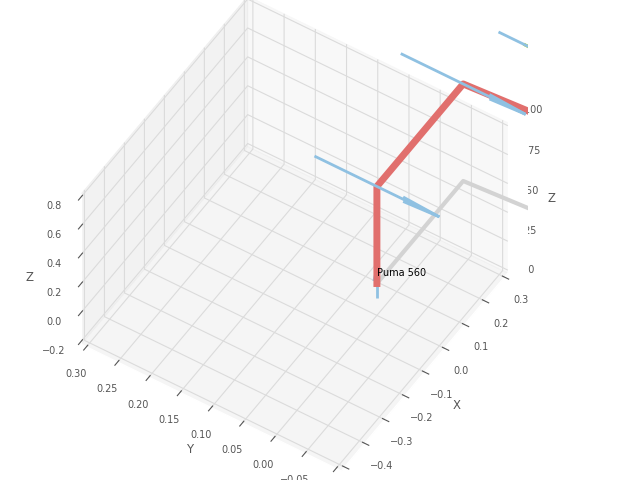

PyPlot3D backend, t = 0.05, scene:
  Puma 560

In [88]:
puma.addconfiguration('qs', [pi,-pi/6,pi/6,pi/4,pi/2,pi/6])
puma.plot(puma.qs,limits=[-0.5, 0.3, -0.1, 0.3,-0.2, 0.8])

<IPython.core.display.Javascript object>


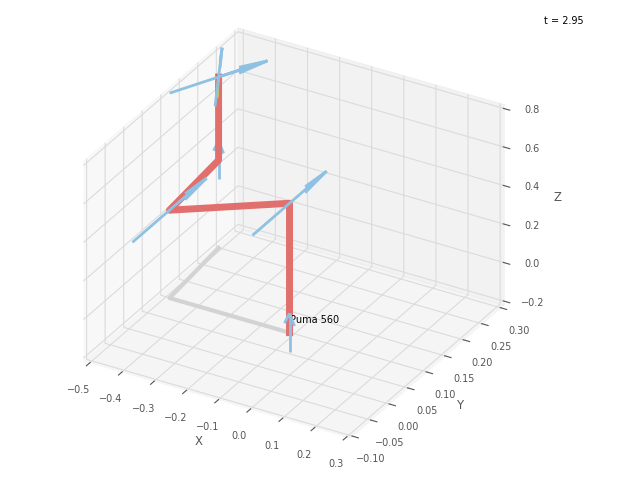

PyPlot3D backend, t = 2.9999999999999973, scene:
  Puma 560

In [101]:
traj = rtb.jtraj(puma.qe, puma.qs,60)
puma.plot(traj.q, limits=[-0.5, 0.3, -0.1, 0.3,-0.2, 0.8])

<IPython.core.display.Javascript object>


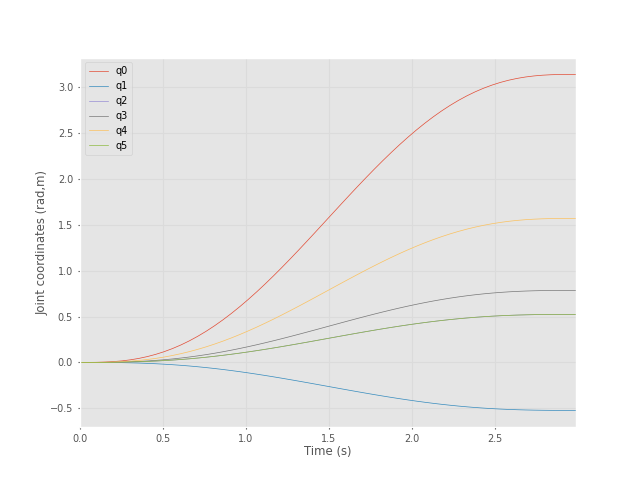

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [90]:
time = np.linspace(0,2.99,60)
rtb.qplot(time,traj.q)

In [91]:
#Position
matriz_xyz= []
for step in traj.q : 
    matriz_homegenea = puma.fkine(step).A
    matriz_xyz.append(matriz_homegenea[0:3,3])

### Plot Trajectories of position [X Y Z] 

<IPython.core.display.Javascript object>


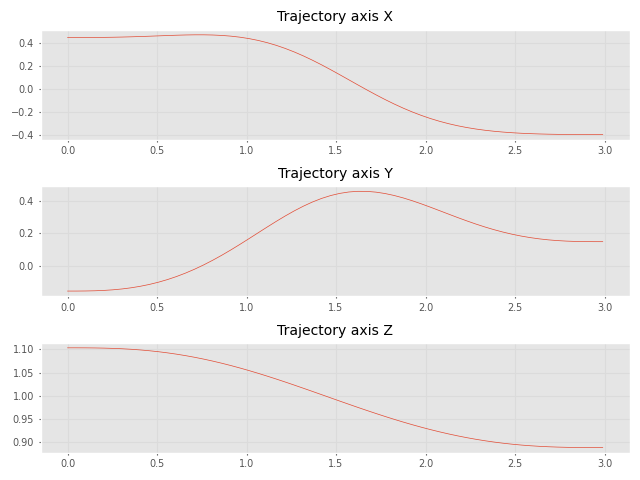

In [117]:
#plots
values_x = [x[0] for x in matriz_xyz]
values_y = [y[1] for y in matriz_xyz]
values_z = [z[2] for z in matriz_xyz]

fig, axis = plt.subplots(3)
axis[0].plot(time, values_x)
axis[0].set_title("Trajectory axis X")
axis[1].plot(time, values_y)
axis[1].set_title("Trajectory axis Y")
axis[2].plot(time, values_z)
axis[2].set_title("Trajectory axis Z")
fig.tight_layout()


In [95]:
M1 = puma.fkine(puma.qe)
M2 = puma.fkine(puma.qs)
M1, M1.A

(   1         0         0         0.4521    
   0         1         0        -0.15      
   0         0         1         1.104     
   0         0         0         1         
,
 array([[ 1.     ,  0.     ,  0.     ,  0.4521 ],
        [ 0.     ,  1.     ,  0.     , -0.15005],
        [ 0.     ,  0.     ,  1.     ,  1.10363],
        [ 0.     ,  0.     ,  0.     ,  1.     ]]))

In [96]:
M2, M2.A

(   0.3536    0.6124    0.7071   -0.3942    
  -0.3536   -0.6124    0.7071    0.1501    
   0.866    -0.5       0         0.8877    
   0         0         0         1         
,
 array([[ 3.53553391e-01,  6.12372436e-01,  7.07106781e-01, -3.94249769e-01],
        [-3.53553391e-01, -6.12372436e-01,  7.07106781e-01,  1.50050000e-01],
        [ 8.66025404e-01, -5.00000000e-01,  5.59735274e-17,  8.87730000e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

## Second Method : Screw Lineal

In [128]:
import matplotlib.pyplot as plt
import pytransform3d.transformations as pt
import pytransform3d.trajectories as ptr
import pytransform3d.plot_utils as ppu

M3 = M1.A
M4 = M2.A

du1 = pt.dual_quaternion_from_transform(M3)
du2 = pt.dual_quaternion_from_transform(M4)

steps = 60

# Screw linear interpolation of dual quaternions (ScLERP)
sclerp_interpolated = np.vstack([pt.dual_quaternion_sclerp(du1, du2, t) for t in np.linspace(0, 1,steps)])
sclerp_interpolated_from_dqs = np.array([pt.transform_from_dual_quaternion(dq) for dq in sclerp_interpolated])

In [107]:
#sclerp_interpolated_from_dqs

In [131]:
from spatialmath import SE3
pos =[]
for mat in sclerp_interpolated_from_dqs:
    a  = puma.ikine_LM(SE3(mat)[0],q0=puma.qs,ilimit=1100,rlimit=200,tol=1e-100,transpose=0.2)[0]
    pos.append(a)

<IPython.core.display.Javascript object>


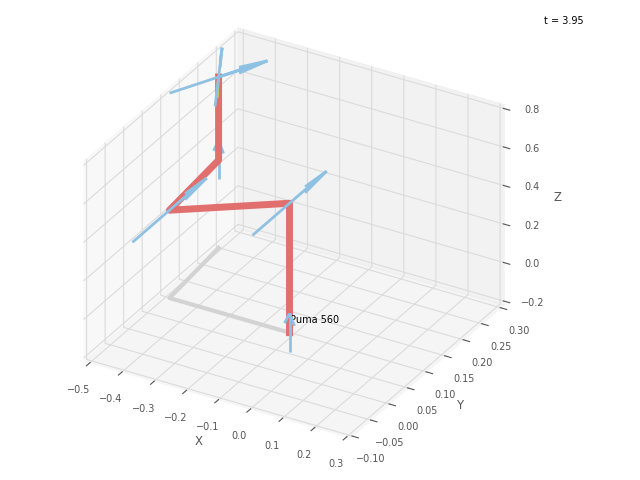

PyPlot3D backend, t = 3.999999999999994, scene:
  Puma 560

In [111]:
puma.plot(np.array(pos),limits=[-0.5, 0.3, -0.1, 0.3,-0.2, 0.8])

In [104]:
ax = pt.plot_transform(A2B=M3, s=0.3, ax_s=2)
pt.plot_transform(A2B=M4, s=0.3, ax=ax)
ax.set_xlim(-0.5, 0.3,)
ax.set_ylim(-0.1, 0.3)
ax.set_zlim(-0.2, 1);
traj_sclerp = ppu.Trajectory(sclerp_interpolated_from_dqs, s=0.1, c="b")
traj_sclerp.add_trajectory(ax)
plt.legend([traj_sclerp.trajectory],["Dual quaternion ScLERP"])
plt.show()

In [98]:
matriz_xyz_SL = [xyz[0:3,3] for xyz in sclerp_interpolated_from_dqs]


### Plot Trajectories of position [X Y Z] -- Screw Lineal

<IPython.core.display.Javascript object>


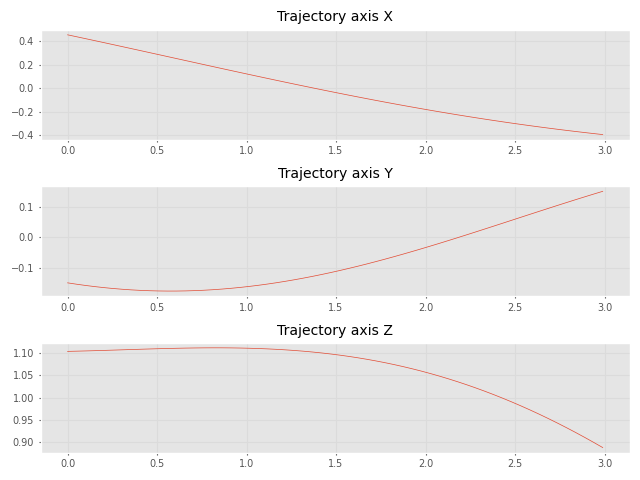

In [66]:
#Plot methond Screw Lineal
values_x_SL = [x[0] for x in matriz_xyz_SL]
values_y_SL = [y[1] for y in matriz_xyz_SL]
values_z_SL = [z[2] for z in matriz_xyz_SL]

fig_SL, axis_SL = plt.subplots(3)
axis_SL[0].plot(time, values_x_SL, label="x")
axis_SL[0].set_title("Trajectory axis X")
axis_SL[1].plot(time, values_y_SL, label="y")
axis_SL[1].set_title("Trajectory axis Y")
axis_SL[2].plot(time, values_z_SL, label="z")
axis_SL[2].set_title("Trajectory axis Z")
fig_SL.tight_layout()


## Method Comparison 

In [118]:
def graph_comparate_methond_trajectory(time, value_axis,value_axis_SL, axis_type):
    plt.plot(time, value_axis, color='r', label= axis_type + ' polynomial')
    plt.plot(time, value_axis_SL, color='b', label= axis_type + ' screw lineal')
    plt.xlabel("time simulation")
    plt.ylabel("position in axis " + axis_type)
    plt.title("MethondComparison  polynomial vs screw lineal in the axis " + axis_type)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


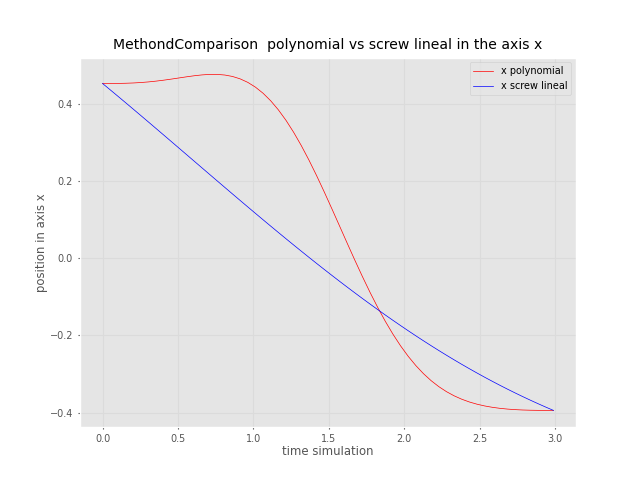

In [122]:
#Comparation in Axis X
graph_comparate_methond_trajectory(time, values_x, values_x_SL, "x")


<IPython.core.display.Javascript object>


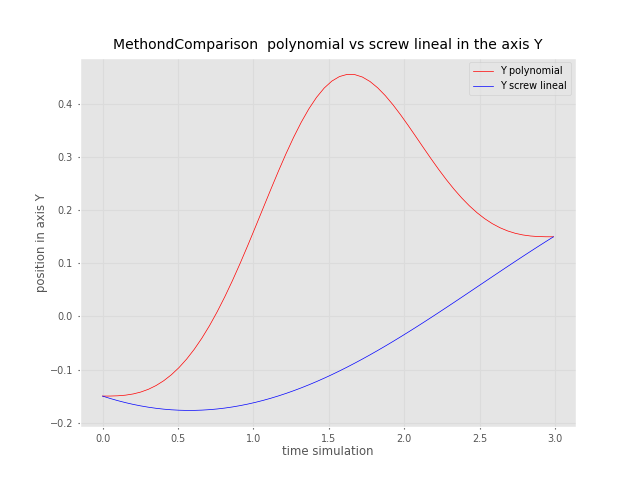

In [123]:
#Comparation in Axis Y
graph_comparate_methond_trajectory(time, values_y, values_y_SL, "Y")

<IPython.core.display.Javascript object>


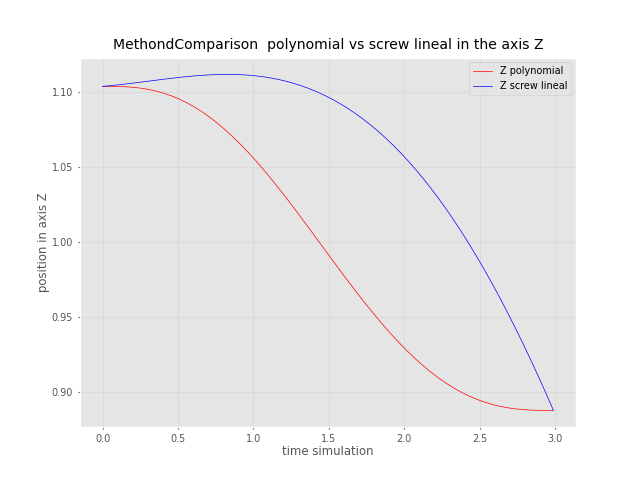

In [124]:
#Comparation in Axis Z
graph_comparate_methond_trajectory(time, values_z, values_z_SL, "Z")

<IPython.core.display.Javascript object>


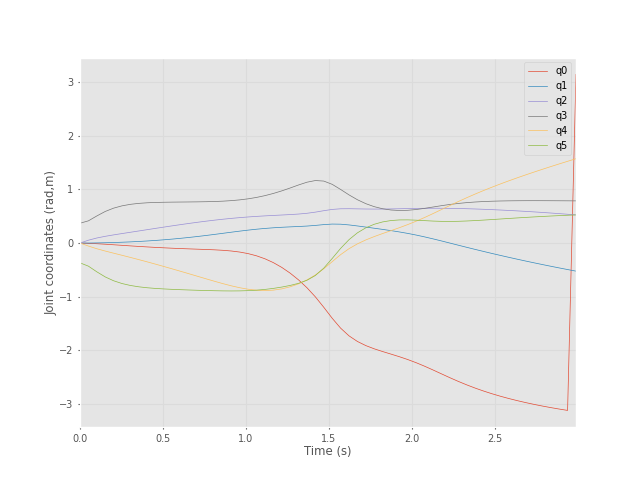

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [132]:
rtb.qplot(time,np.array(pos))

In [133]:
i = 0
comparar01 = []
comparar23 = []
comparar45 = []
for p in pos:
    comparar01.append([np.array(traj.q)[i][0],np.array(pos)[i][0],np.array(traj.q)[i][1],np.array(pos)[i][1]])
    comparar23.append([np.array(traj.q)[i][2],np.array(pos)[i][2],np.array(traj.q)[i][3],np.array(pos)[i][3]])
    comparar45.append([np.array(traj.q)[i][4],np.array(pos)[i][4],np.array(traj.q)[i][5],np.array(pos)[i][5]])
    i=i+1

<IPython.core.display.Javascript object>


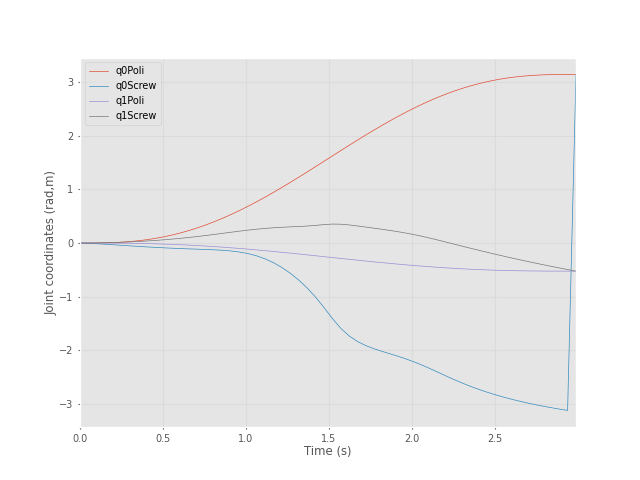

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [134]:
rtb.qplot(time, np.array(comparar01), labels=["q0Poli", "q0Screw", "q1Poli","q1Screw" ])

<IPython.core.display.Javascript object>


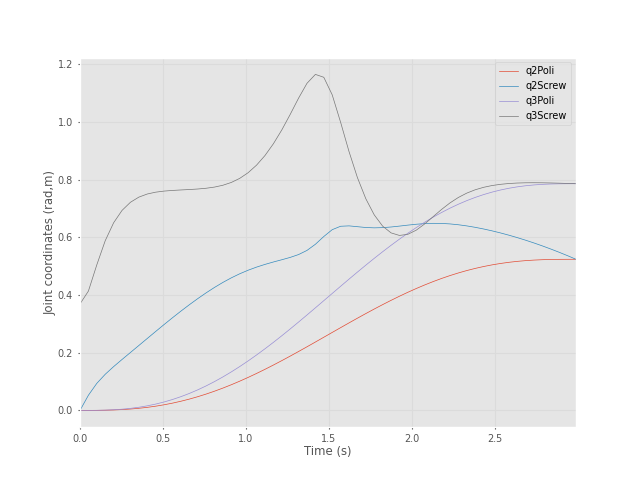

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [135]:
rtb.qplot(time, np.array(comparar23), labels=["q2Poli", "q2Screw", "q3Poli","q3Screw" ])

<IPython.core.display.Javascript object>


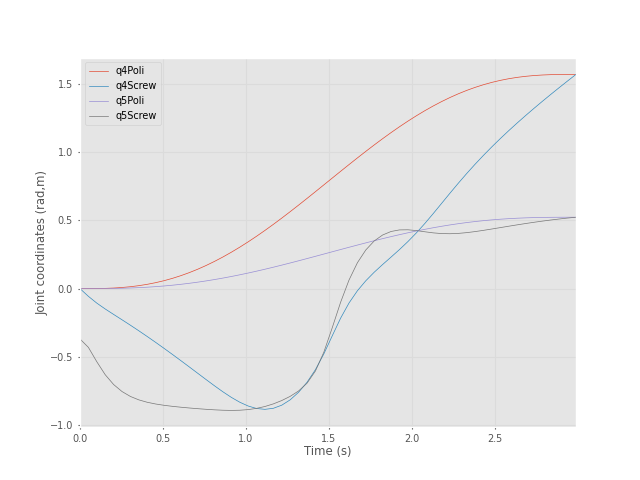

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [136]:
rtb.qplot(time, np.array(comparar45), labels=["q4Poli", "q4Screw", "q5Poli","q5Screw" ])